In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_18084\1478074700.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df= pd.read_csv("rideshare_kaggle.csv")

In [3]:
df.shape

(693071, 57)

In [31]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [32]:
df.shape

(693071, 57)

In [75]:
df.isnull().sum()

hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
t

In [78]:
df['cab_type']=='Uber'

0         True
1         True
2         True
3         True
4         True
          ... 
385658    True
385659    True
385660    True
385661    True
385662    True
Name: cab_type, Length: 385663, dtype: bool

In [79]:
df[df['cab_type']=='Uber']

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385658,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
385659,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
385660,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
385661,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [35]:
df_2['price'].value_counts()

9.5     22738
10.5    19893
8.5     18270
7.5     17951
7.0     16461
        ...  
87.0        1
56.5        1
65.0        1
64.0        1
67.0        1
Name: price, Length: 127, dtype: int64

In [36]:
df_2.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,3.856630e+05,385663.000000,385663.000000,385663.000000,330568.000000,385663.000000,385663.0,385663.000000,385663.000000,385663.000000,...,385663.000000,3.856630e+05,385663.000000,3.856630e+05,385663.000000,3.856630e+05,385663.000000,3.856630e+05,385663.000000,3.856630e+05
mean,1.544046e+09,11.611339,17.811014,11.586344,15.795343,2.191386,1.0,42.338014,-71.066121,39.574827,...,0.037363,1.544045e+09,33.450563,1.544042e+09,45.246955,1.544048e+09,29.716968,1.544049e+09,41.976659,1.544049e+09
std,6.896209e+05,6.942097,9.974964,0.492489,8.560300,1.178973,0.0,0.048001,0.020319,6.722616,...,0.055201,6.916629e+05,6.471418,6.906665e+05,5.641402,6.905871e+05,7.117767,6.875846e+05,6.933250,6.915221e+05
min,1.543204e+09,0.000000,1.000000,11.000000,4.500000,0.020000,1.0,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.300000,1.0,42.350300,-71.081000,36.500000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,12.500000,2.170000,1.0,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,21.500000,2.840000,1.0,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.090000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,89.500000,7.860000,1.0,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [37]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

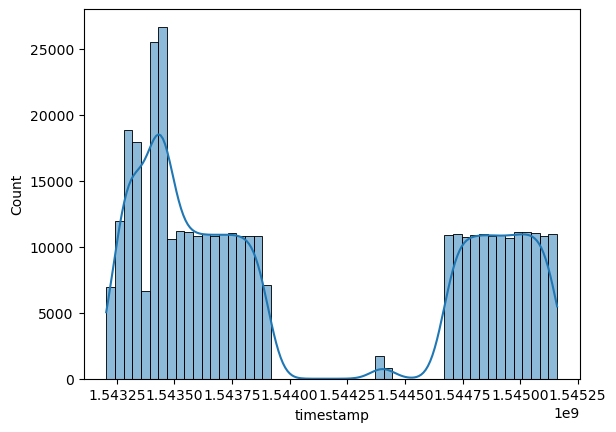

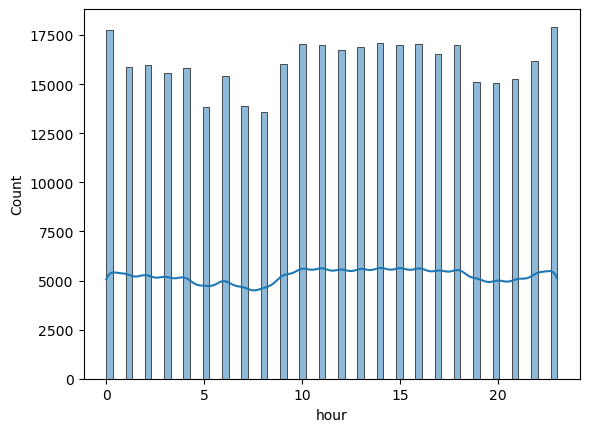

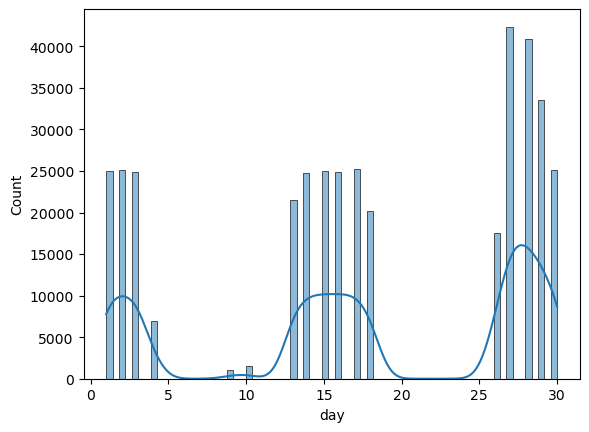

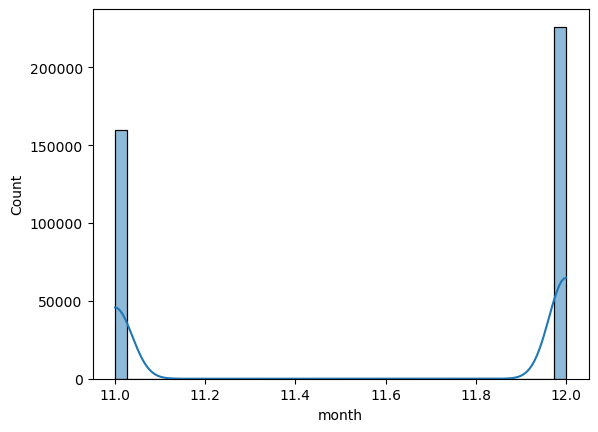

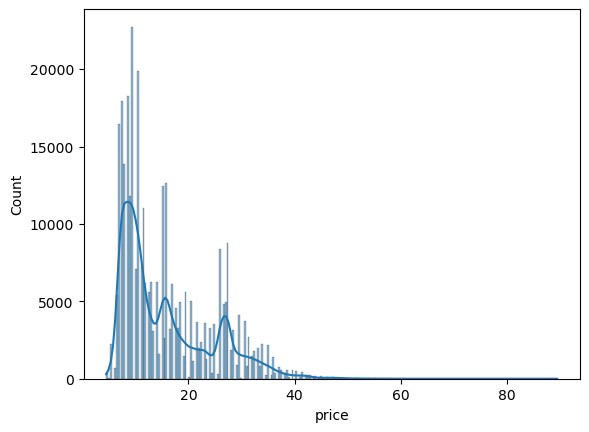

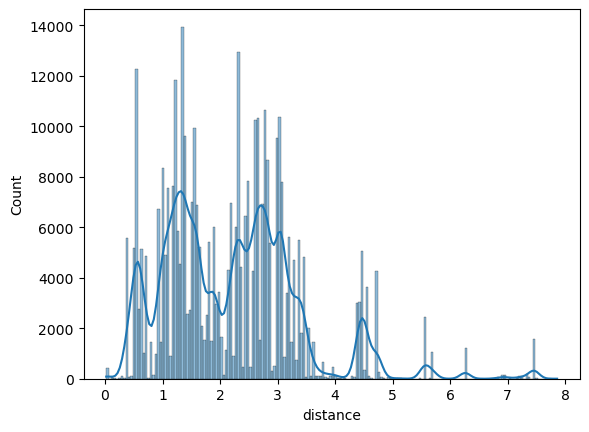

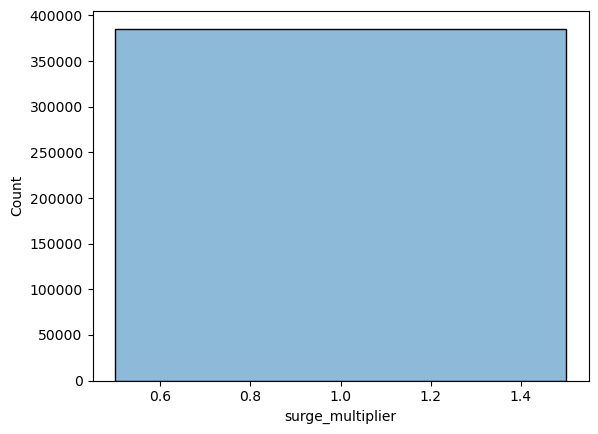

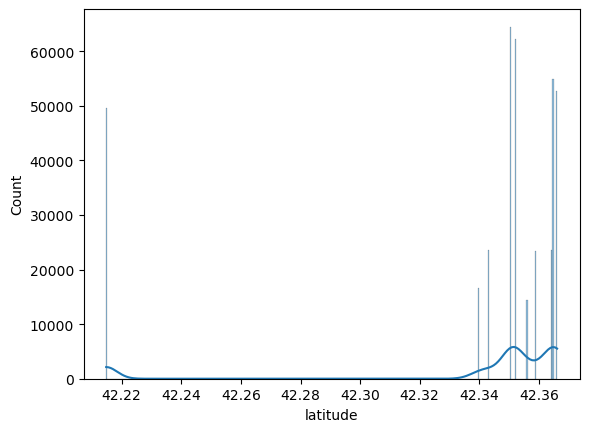

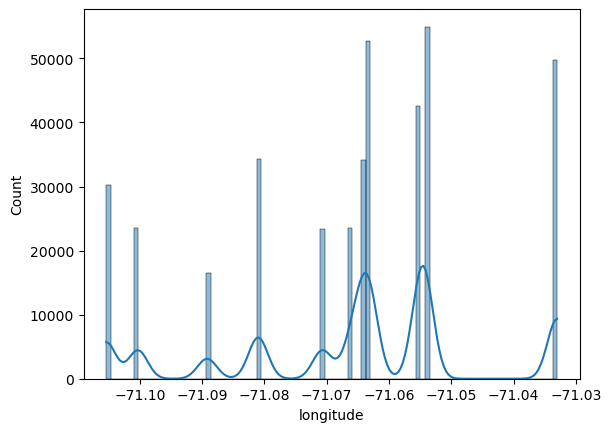

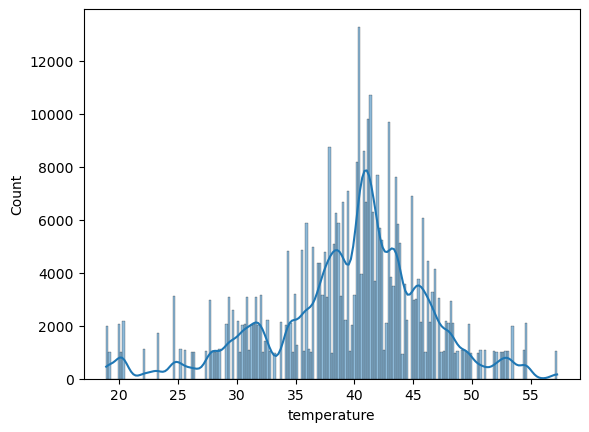

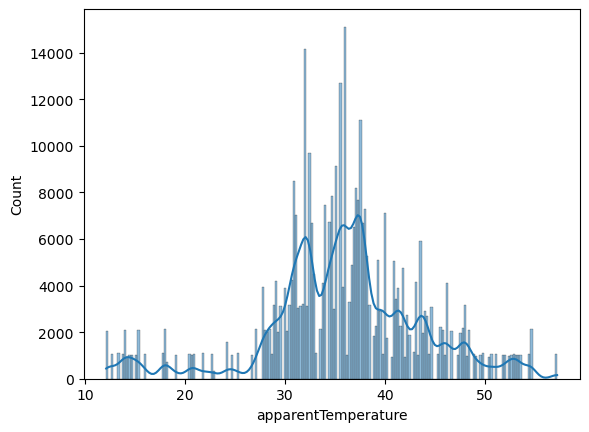

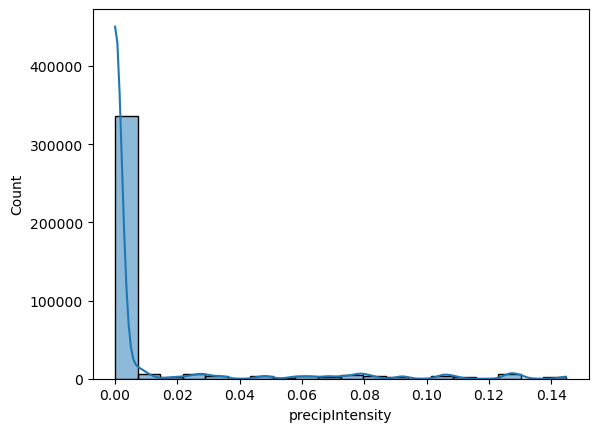

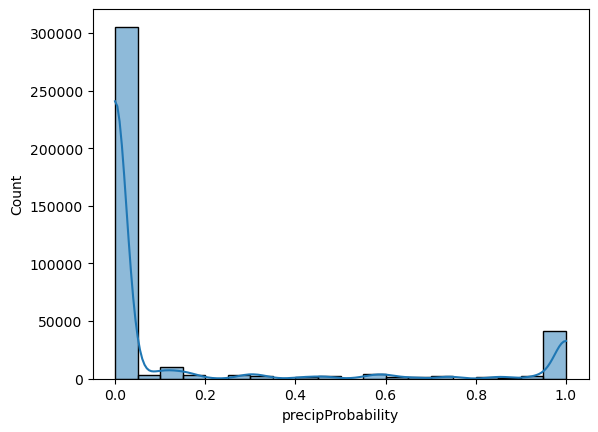

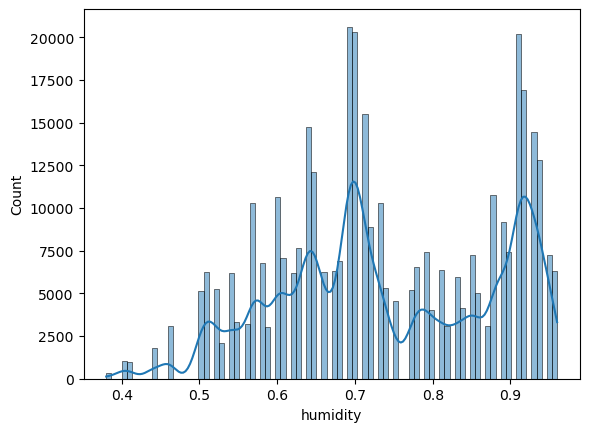

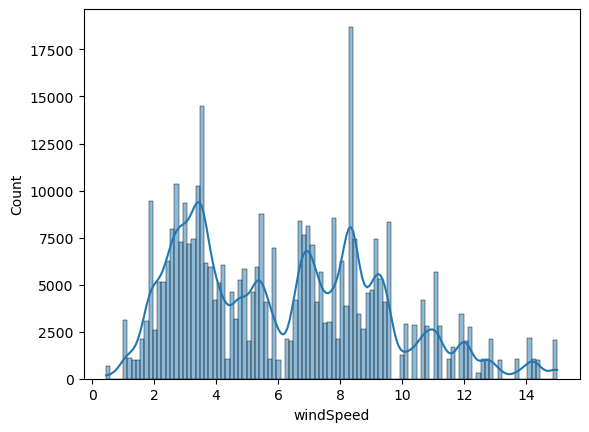

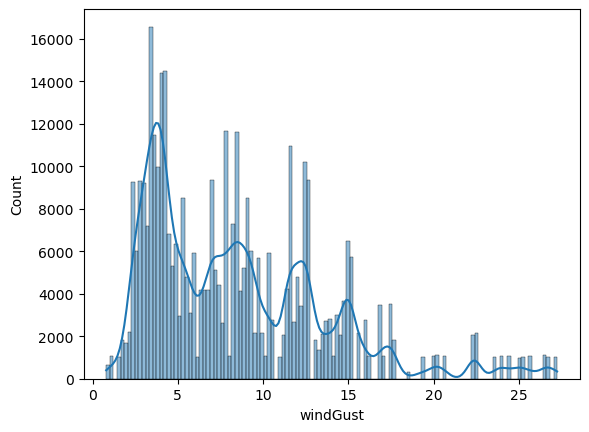

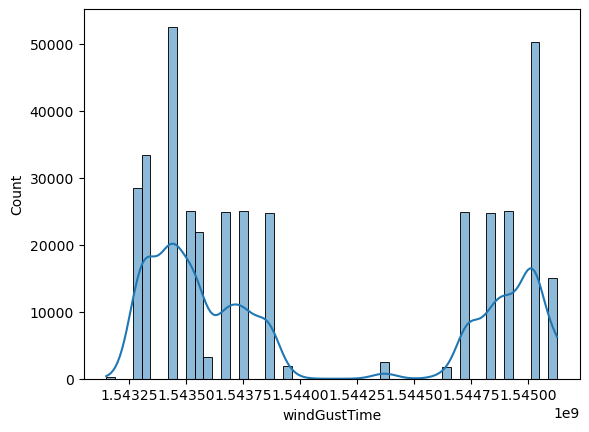

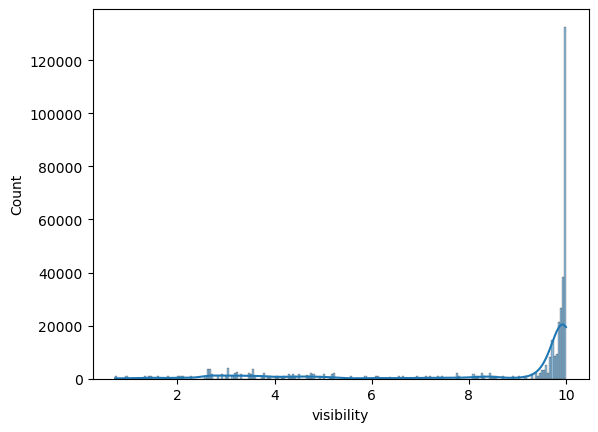

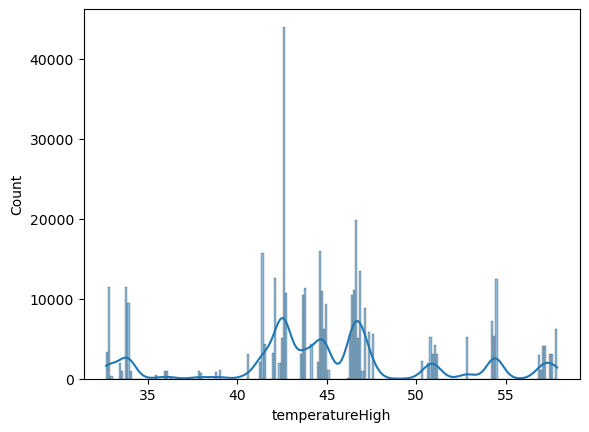

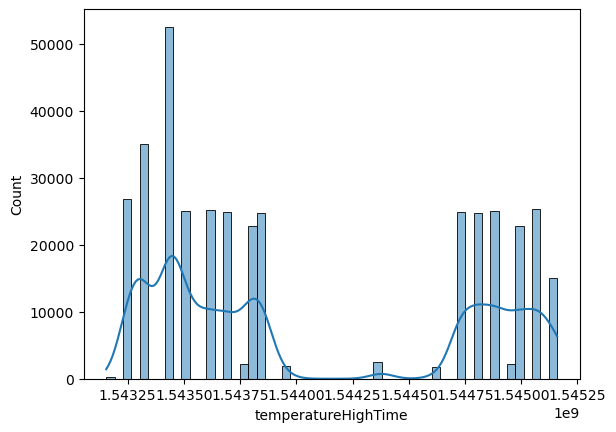

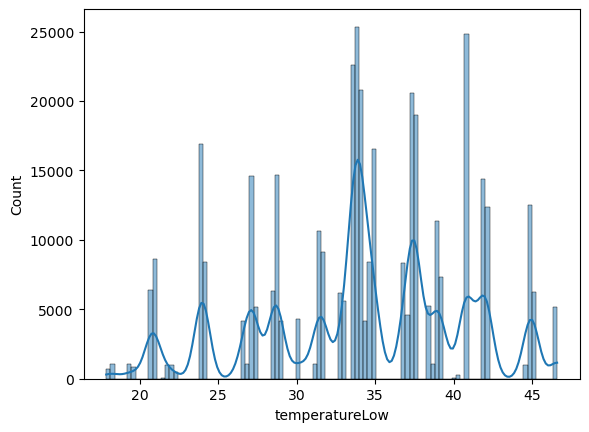

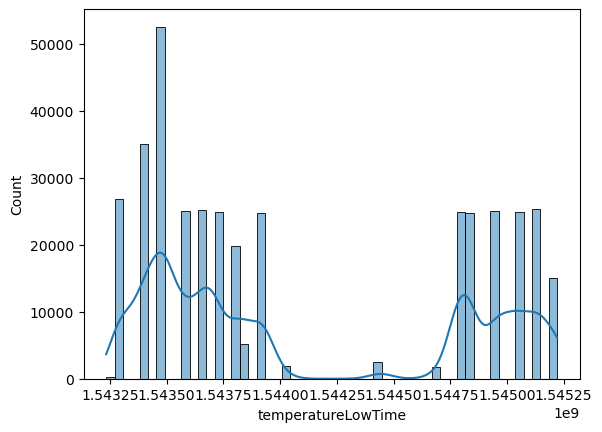

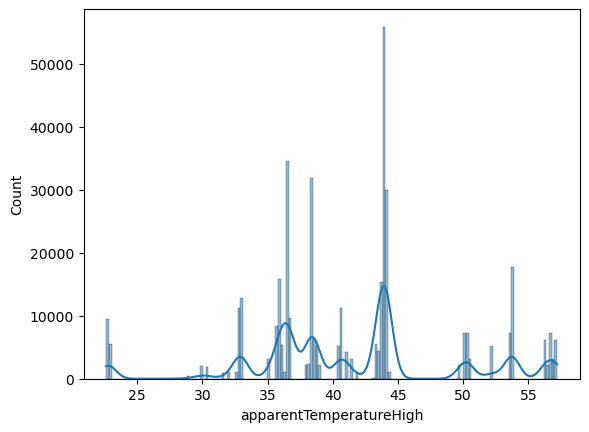

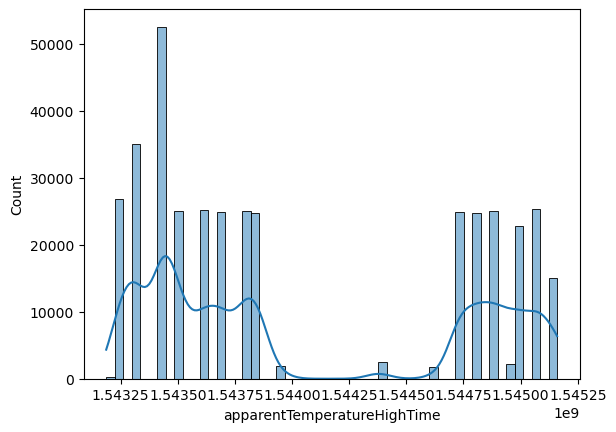

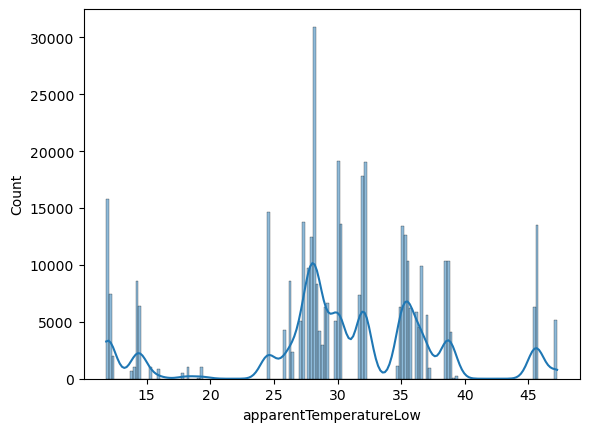

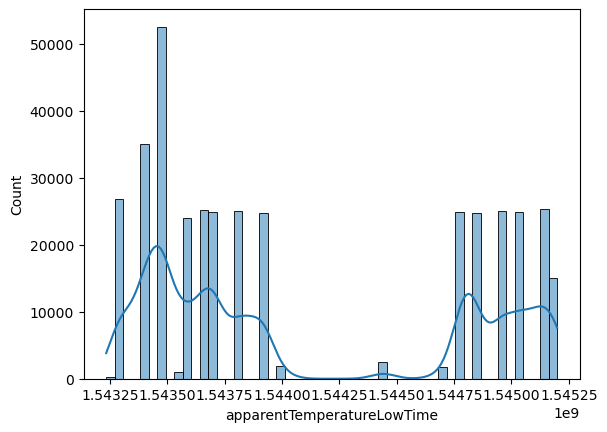

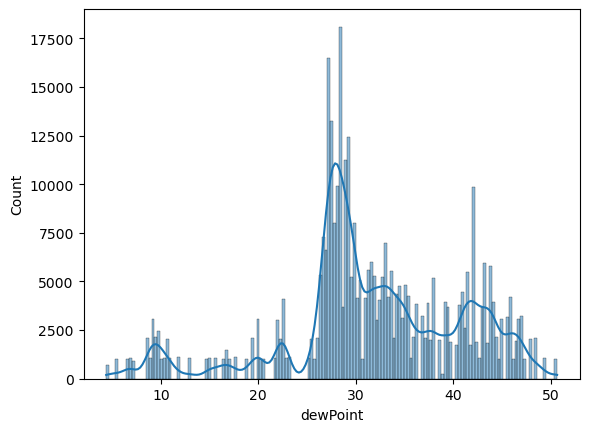

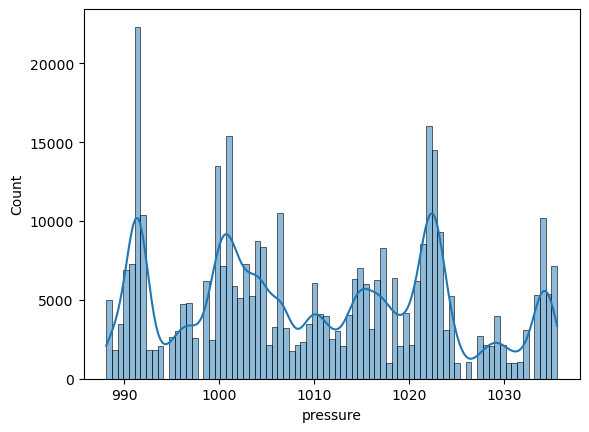

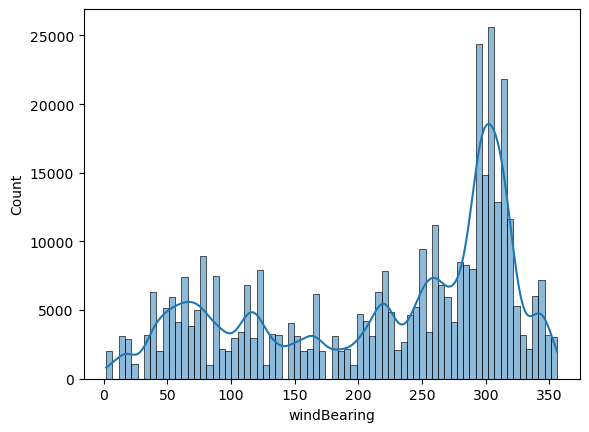

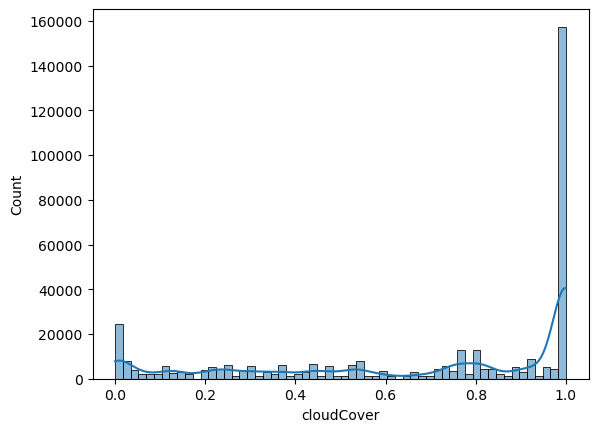

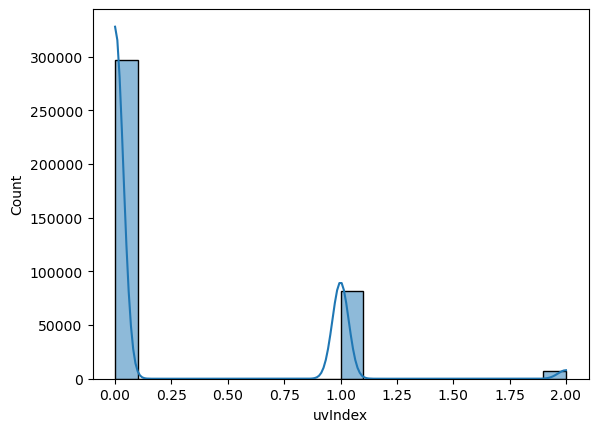

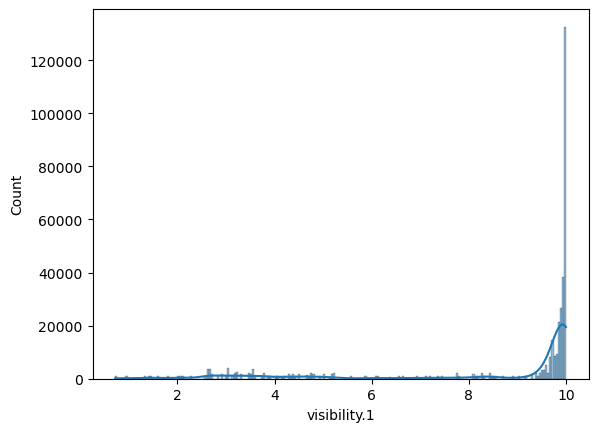

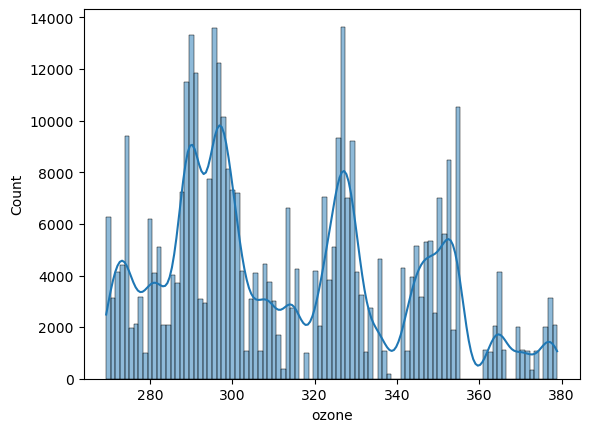

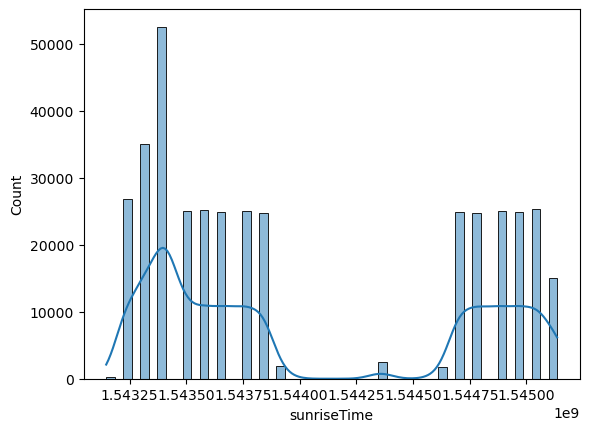

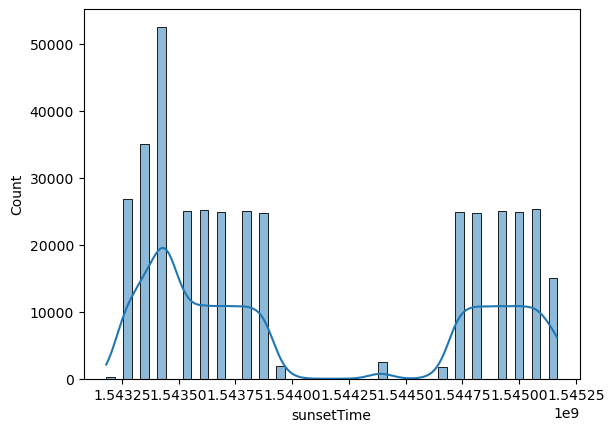

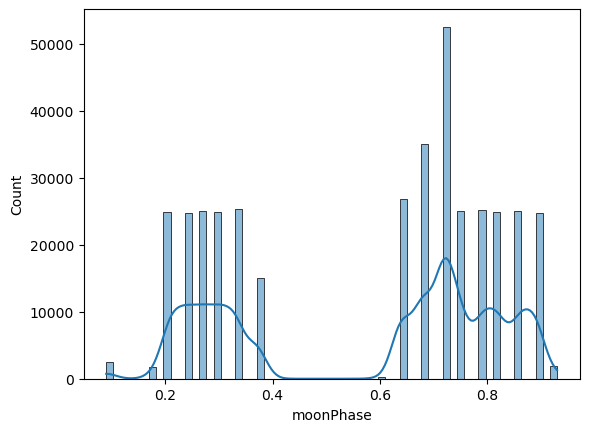

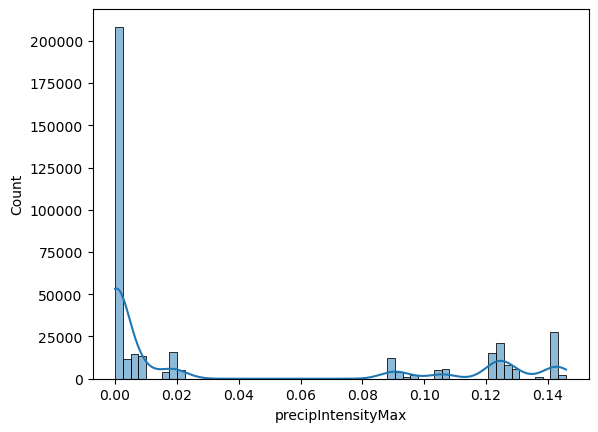

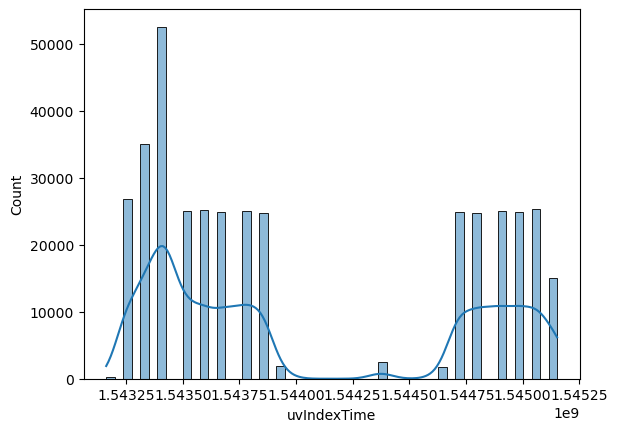

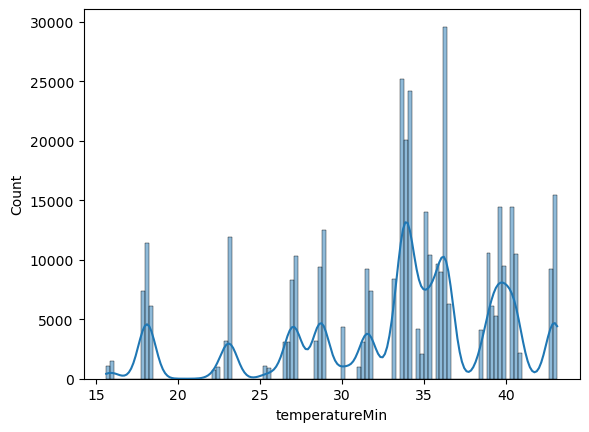

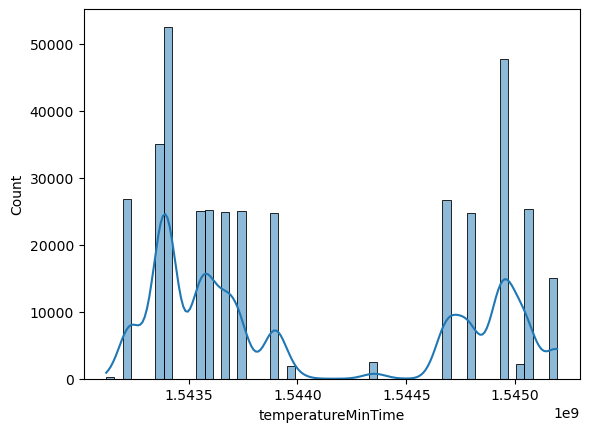

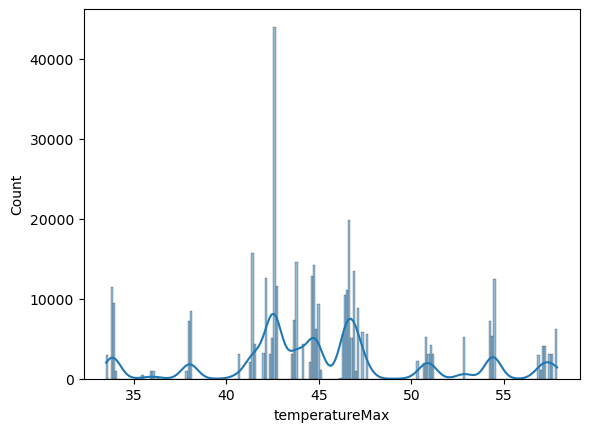

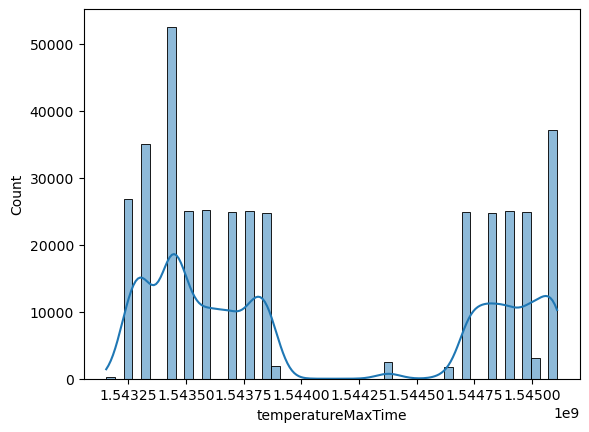

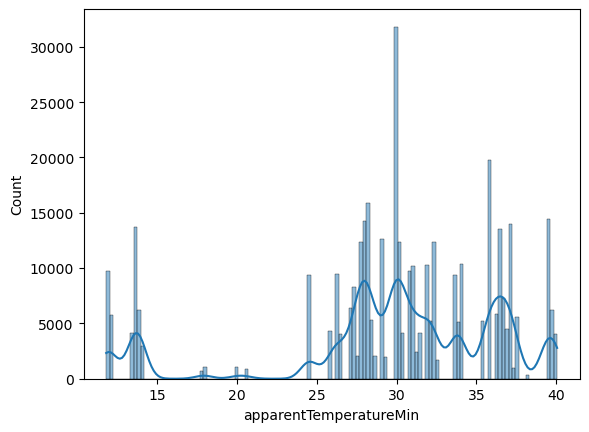

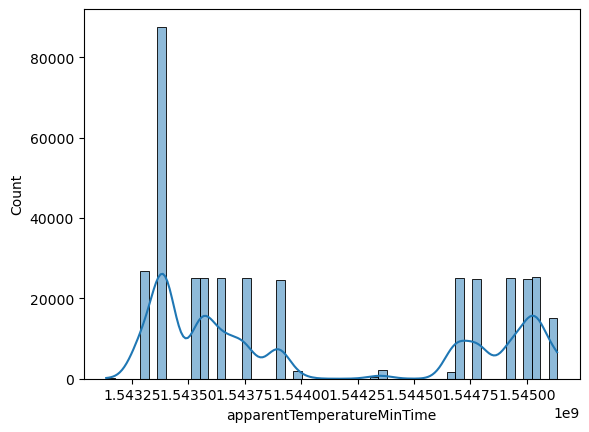

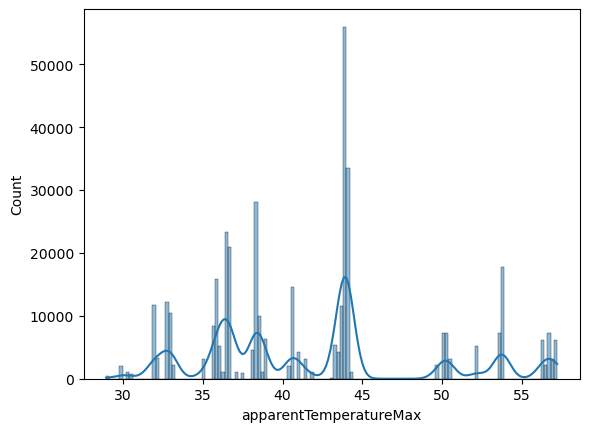

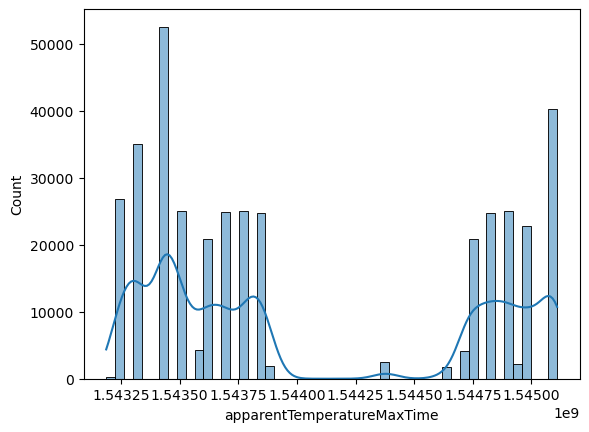

In [38]:
for i in numerical_features:
    sns.histplot(data=df_2 , x=i ,kde=True )
    plt.show()

In [39]:
# for i in categorical_features:   
#     sns.countplot(data=df_2 , x=i , hue='price' )
#     plt.show()

In [40]:
categorical_features

['id',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [41]:
df_2.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [42]:
df_2['source'].value_counts()

Financial District         32620
Theatre District           32283
Boston University          32144
North End                  32143
Northeastern University    32142
Fenway                     32137
Back Bay                   32137
South Station              32130
Haymarket Square           32122
West End                   32074
Beacon Hill                31939
North Station              31792
Name: source, dtype: int64

In [43]:
df_2.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [44]:
## now we will handle missing values using SIMPLE IMPUTER
## automate the whole process using pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ##feature scaling
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

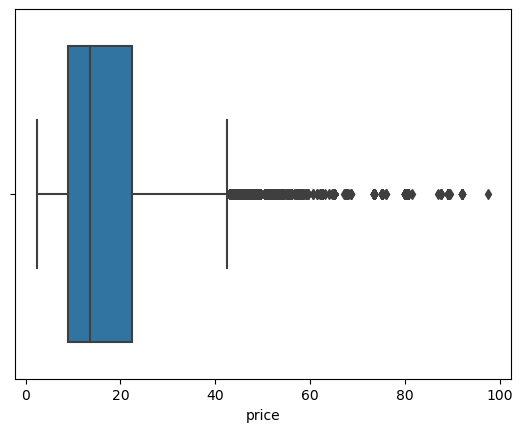

In [45]:
sns.boxplot(df['price'])

In [56]:
# df_2.to_csv('Uber.csv')

In [70]:
df= pd.read_csv('Uber.csv')
df.drop(labels=['id','timestamp','Unnamed: 0'],axis=1 , inplace=True)

In [71]:
df.columns

Index(['hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentT

In [72]:
df.head()

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [66]:
# df.drop(labels=['id','timestamp','Unnamed: 0'],axis=1 , inplace=True)